# Sentiment Analysis Using Machine Learning
### IMDb Movie Reviews

**Author**: Oliver Carey     
**Date**: Friday, 27th September 2024

---



## 1. Introduction

Sentiment analysis, also known as opinion mining, is the process of identifying and categorizing opinions expressed in text to determine whether the sentiment is positive, negative, or neutral. In this project, we explore sentiment analysis using machine learning models on the **IMDb Movie Reviews** dataset. 

The IMDb dataset is commonly used in sentiment analysis projects because it contains a large number of well-labeled reviews (50,000 in total), with an even distribution between positive and negative sentiments. This balanced dataset makes it ideal for binary classification tasks, providing a robust benchmark for evaluating different machine learning models.

We will be comparing four machine learning models: **Logistic Regression**, **Support Vector Machine (SVM)**, **Random Forest**, and **XGBoost**. These models were selected for their varied strengths in text classification:

- **Logistic Regression**: Simple, efficient, and often serves as a strong baseline for binary classification tasks.
- **SVM**: Known for its effectiveness in high-dimensional spaces, which is advantageous for text classification tasks using TF-IDF.
- **Random Forest**: An ensemble learning method that builds multiple decision trees, offering robustness and resistance to overfitting.
- **XGBoost**: A powerful and efficient gradient boosting algorithm that often performs exceptionally well on complex datasets, balancing speed and accuracy.

This project will explore the performance of each of these models in the context of sentiment analysis, comparing their accuracy, precision, recall, F1-score, and training time.


## 2. Logistic Regression

### 2.1. Importing Libraries & Preprocessing

In this section, we begin by importing the necessary libraries and performing data preprocessing. We use **TF-IDF (Term Frequency-Inverse Document Frequency)** vectorisation to convert the text data into numerical features. TF-IDF was chosen over other vectorisation methods, such as **Bag of Words**, because it not only considers the frequency of words within individual documents but also takes into account how often they appear across the entire dataset. This helps the model prioritise more meaningful words while reducing the weight of commonly used, less informative words like "the" and "is."

Additionally, we use a **50/50 train-test split** to evaluate the models. This even split is typical for sentiment analysis tasks when working with relatively large datasets like IMDb, where the dataset size allows for sufficient training and testing data. By splitting the data evenly, we ensure that the model is trained on a large portion of the data, while also being rigorously tested on an equally large portion of unseen data to assess its generalisability. In cases with smaller datasets, a more conservative split like 80/20 or 70/30 might be used to ensure the model has enough data to learn from.

The sentiment labels in the IMDb dataset are binary, with 0 representing negative reviews and 1 representing positive reviews. This binary setup is ideal for training classifiers to distinguish between two distinct classes.


In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load the IMDb dataset
data = pd.read_csv('data/IMDB Dataset.csv')  

# Display the first few rows of the dataset to get an overview
print(data.head())

# Map the sentiment labels to binary (positive = 1, negative = 0)
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

# Print the updated structure of the dataset to ensure the labels are mapped correctly
print(data.head())

# Initialize the TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

# Preprocess the text and fit the TF-IDF vectorizer on the reviews
X = tfidf.fit_transform(data['review'])  # Transform the reviews into TF-IDF features
y = data['sentiment']  # Target labels

# Split the data into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

print("Data loaded and preprocessed successfully!")

# Print the shapes to verify the split
print(f"Training set shape: {X_train_tfidf.shape}")
print(f"Testing set shape: {X_test_tfidf.shape}")


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
                                              review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1
Data loaded and preprocessed successfully!
Training set shape: (25000, 5000)
Testing set shape: (25000, 5000)


### 2.2. Training the Logistic Regression Model

We train the **Logistic Regression** model using the TF-IDF-transformed text data. Since TF-IDF creates a high-dimensional feature space, we increase the `max_iter` parameter to ensure the model converges during training. Logistic Regression is a linear model that works by fitting a linear decision boundary to separate the positive and negative classes.

#### Why Increase `max_iter`?
By default, Logistic Regression may not converge when handling large feature spaces, such as the 5000-dimensional space created by TF-IDF. To ensure the model reaches an optimal solution, we increase `max_iter` to 1000 iterations, allowing more steps in the optimisation process. This adjustment ensures convergence and helps avoid early stopping.
.



In [8]:
import time
from sklearn.linear_model import LogisticRegression

# Start timing
start_time = time.time()

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)  
model.fit(X_train_tfidf, y_train)

# End timing
end_time = time.time()

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate training time
training_time = end_time - start_time

print(f"Model training complete and predictions made on the test set.")
print(f"Training time: {training_time:.2f} seconds")



Model training complete and predictions made on the test set.
Training time: 0.52 seconds


### 2.3. Model Evaluation

Once the **Logistic Regression** model has been trained, we evaluate its performance using standard classification metrics: **accuracy**, **precision**, **recall**, and **F1-score**. These metrics provide a comprehensive understanding of the model's ability to correctly classify both positive and negative reviews.

#### Classification Report and Accuracy Metrics
The classification report provides the following metrics for both the positive and negative classes:
- **Precision**: The proportion of true positives out of all instances predicted as positive.
- **Recall**: The proportion of true positives out of all actual positive instances.
- **F1-score**: The harmonic mean of precision and recall, providing a balanced measure that accounts for both false positives and false negatives.e.



In [11]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate the model on the test set using classification metrics
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred))

# Calculate the training accuracy (evaluate the model on the training data)
train_accuracy = model.score(X_train_tfidf, y_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.90      0.87      0.88     12483
           1       0.87      0.90      0.89     12517

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000

Training Accuracy: 91.42%
Test Accuracy: 88.44%


The Logistic Regression model achieved an accuracy of **88.44%**, with balanced precision and recall scores for both positive and negative sentiment. The model slightly favours recalling negative reviews (recall of 0.90) while maintaining strong precision for positive reviews (precision of 0.90). This consistent performance across both classes helps minimise false positives and false negatives. The training accuracy of **91.42%** suggests the model generalises well, with only a slight drop in performance on the test set.


### 2.4. Visualising Logistic Regression Model Performance

To further evaluate the performance of the **Logistic Regression** model, we visualise the **confusion matrix**. The confusion matrix provides insight into the types of errors the model is making, breaking down the number of **true positives**, **true negatives**, **false positives**, and **false negatives**. 

#### Confusion Matrix Breakdown
- **True Positives (TP)**: Reviews correctly predicted as positive.
- **True Negatives (TN)**: Reviews correctly predicted as negative.
- **False Positives (FP)**: Reviews incorrectly predicted as positive (when they were actually negative).
- **False Negatives (FN)**: Reviews incorrectly predicted as negative (when they were actually positive).


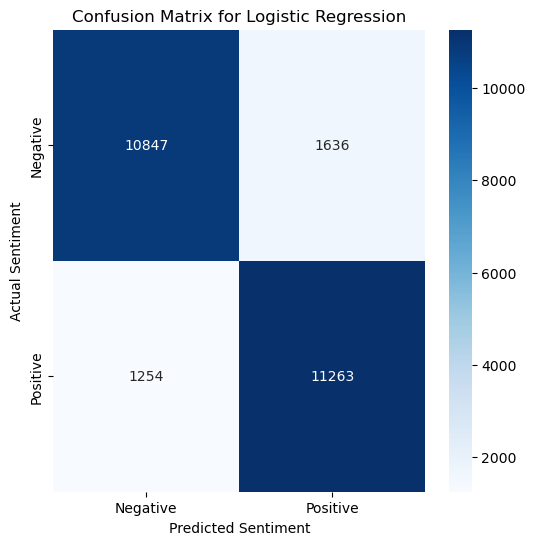

In [15]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


Overall, the Logistic Regression model demonstrates balanced performance, with strong accuracy in predicting both positive and negative reviews. The slightly higher count of false positives (1,636) compared to false negatives (1,254) indicates that the model is somewhat more likely to misclassify negative reviews as positive. However, these misclassifications remain relatively low, reflecting the model’s reliable performance in sentiment classification.


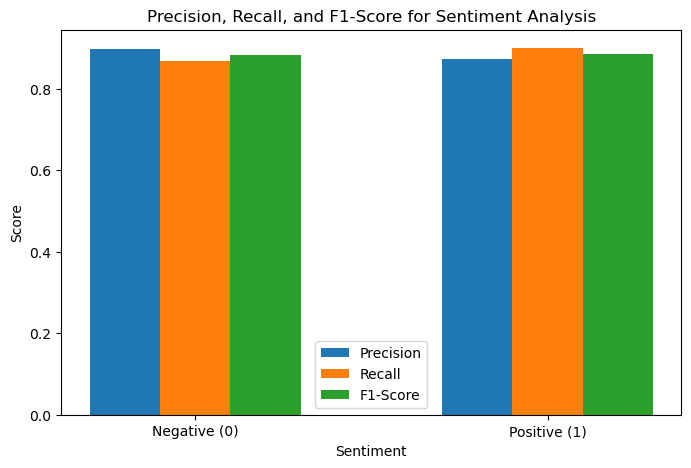

In [18]:
# Bar plot of precision, recall, and F1-score for both classes
metrics = classification_report(y_test, y_pred, output_dict=True)

# Prepare data for the bar chart
categories = ['Negative (0)', 'Positive (1)']
precision = [metrics['0']['precision'], metrics['1']['precision']]
recall = [metrics['0']['recall'], metrics['1']['recall']]
f1_score = [metrics['0']['f1-score'], metrics['1']['f1-score']]

# Plotting the metrics
plt.figure(figsize=(8, 5))
x = range(len(categories))
plt.bar(x, precision, width=0.2, label='Precision', align='center')
plt.bar([i + 0.2 for i in x], recall, width=0.2, label='Recall', align='center')
plt.bar([i + 0.4 for i in x], f1_score, width=0.2, label='F1-Score', align='center')

plt.xlabel('Sentiment')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score for Sentiment Analysis')
plt.xticks([i + 0.2 for i in x], categories)
plt.legend()
plt.show()


**Negative Sentiment (0)**:
  - Precision: High accuracy in identifying negative reviews.
  - Recall: Slightly lower recall, missing some negative reviews.
  - F1-Score: Balanced performance for negative classification.

**Positive Sentiment (1)**:
  - Precision: Very accurate in predicting positive reviews.
  - Recall: Slightly better at catching positive reviews than negative.
  - F1-Score: Consistently strong performance for positive sentiment.


## 3. Support Vector Machine (SVM)
### 3.1. Preprocessing Using TF-IDF

For consistency across all models, we reuse **TF-IDF (Term Frequency-Inverse Document Frequency)** vectorisation to transform the text data into numerical features. This consistent preprocessing ensures that the results of the various models can be fairly compared, as they are all trained on the same feature set.

#### Handling High-Dimensional Data: SVM vs. Logistic Regression
Both **Support Vector Machines (SVM)** and **Logistic Regression** are capable of handling high-dimensional data, such as the large feature sets created by TF-IDF, but they do so in different ways, which affects their performance on text data.

- **Support Vector Machine (SVM)**: SVM is particularly well-suited for high-dimensional spaces, as it constructs a hyperplane that maximally separates the classes (positive and negative reviews). One of the key strengths of SVM is its ability to create decision boundaries in spaces with many features, even when the data is not linearly separable. By using a **kernel trick**, SVM can transform the feature space into higher dimensions, allowing it to find a linear decision boundary even in complex datasets. This is especially important for text classification tasks like this, where the TF-IDF transformation can result in thousands of features.

- **Logistic Regression**: In contrast, Logistic Regression is a linear model that directly tries to fit a linear boundary between the classes based on the weighted sum of the features. While Logistic Regression is highly efficient, its performance may degrade if the data is not linearly separable, particularly in high-dimensional spaces. It doesn't inherently handle non-linearity like SVM with the kernel trick. However, Logistic Regression can still perform well in high-dimensional spaces when the data is well-structured, as is often the case with TF-IDF, where important words can serve as linear discriminators between classes.

### 3.2. Train the SVM Model

We use a **Support Vector Machine (SVM)** with a **linear kernel** for this text classification task. The linear kernel is chosen because it works well with high-dimensional datasets like the one produced by TF-IDF vectorisation. Text classification tasks often generate thousands of features, and a linear decision boundary is typically sufficient to separate the classes (positive and negative reviews) when using TF-IDF features..


In [23]:
from sklearn.svm import SVC

# Start timing
start_time = time.time()

# Train a Support Vector Classifier (SVC) model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# End timing
end_time = time.time()

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_tfidf)

# Calculate training time
training_time = end_time - start_time

print("SVM Model training complete and predictions made on the test set.")
print(f"Training time: {training_time:.2f} seconds")


SVM Model training complete and predictions made on the test set.
Training time: 700.17 seconds


### 3.3. Evaluate the SVM Model


In [26]:
# Evaluate the SVM model on the test set using classification metrics
print("SVM Classification Report (Test Set):")
print(classification_report(y_test, y_pred_svm))


# Calculate the training accuracy (evaluate the model on the training data)
svm_train_accuracy = svm_model.score(X_train_tfidf, y_train)
print(f"SVM Training Accuracy: {svm_train_accuracy * 100:.2f}%")

# Calculate accuracy on the test set
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Test Accuracy: {svm_accuracy * 100:.2f}%")


SVM Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     12483
           1       0.87      0.89      0.88     12517

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000

SVM Training Accuracy: 92.62%
SVM Test Accuracy: 88.10%


The SVM model achieved an accuracy of **88.10%** with balanced precision and recall for both positive and negative sentiment. The model slightly favours recalling positive reviews (recall of 0.89) while maintaining strong precision for negative reviews (precision of 0.89). The F1-scores are consistent, reflecting reliable performance across both classes.

### 3.4. Visualising the SVM Model Performance

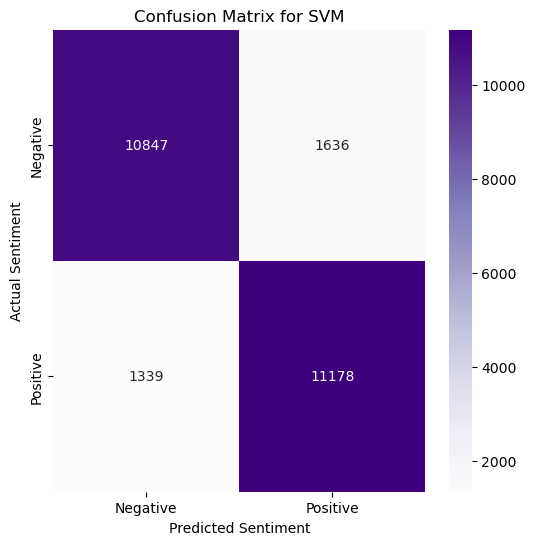

In [28]:
# Generate the confusion matrix for SVM
svm_conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix for SVM
plt.figure(figsize=(6,6))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.title('Confusion Matrix for SVM')
plt.show()


Overall, the SVM model demonstrates balanced performance, similar to the Logistic Regression model. Both models show strong accuracy in predicting positive and negative reviews. The SVM model has a slightly higher count of false negatives (1,339) compared to false positives (1,636), indicating a tendency to misclassify positive reviews as negative, whereas Logistic Regression showed the reverse. Despite these small differences, the misclassifications remain relatively low, reinforcing the reliable sentiment classification capabilities observed in both models.

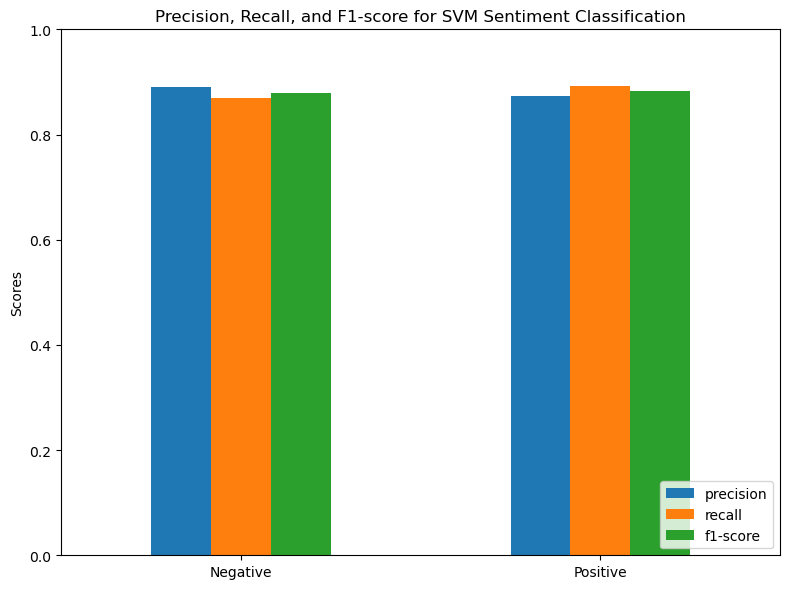

In [31]:
# Generate the classification report as a dictionary
report = classification_report(y_test, y_pred_svm, target_names=['Negative', 'Positive'], output_dict=True)

# Convert the report dictionary to a DataFrame for easier plotting
df_report = pd.DataFrame(report).transpose()

# Only keep precision, recall, and F1-score for the two sentiment classes
df_report_filtered = df_report[['precision', 'recall', 'f1-score']].iloc[:2]  # Keeping only 'Negative' and 'Positive' classes

# Plot the bar chart
df_report_filtered.plot(kind='bar', figsize=(8, 6))
plt.title('Precision, Recall, and F1-score for SVM Sentiment Classification')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

**Negative Sentiment (0):**

- **Precision**: Strong accuracy in identifying negative reviews, minimising false positives.
- **Recall**: Slightly lower recall compared to precision, indicating that some negative reviews are missed.
- **F1-Score**: Balanced performance, maintaining a reliable balance between precision and recall for negative classification.

**Positive Sentiment (1):**

- **Precision**: High accuracy in predicting positive reviews, similar to the model's performance for negative sentiment.
- **Recall**: Slightly better recall for positive reviews, meaning the model is more effective at catching most positive reviews.
- **F1-Score**: Consistent and strong performance for positive sentiment, reflecting reliable predictions.

## 4. Random Forest

### 4.1. Train the Random Forest Model

**Random Forest** is an ensemble learning method that combines multiple decision trees to improve classification accuracy and reduce overfitting. By averaging the predictions of many decision trees, Random Forest is robust and less sensitive to noise or outliers. This makes it a popular choice for many machine learning tasks, including text classification.

In this project, we train the Random Forest model on the TF-IDF-transformed text data. Random Forest typically handles high-dimensional data well and can capture non-linear relationships between features, which is useful in some text classification scenarios.


In [37]:
from sklearn.ensemble import RandomForestClassifier

# Start timing
start_time = time.time()

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model on the TF-IDF transformed data
rf_model.fit(X_train_tfidf, y_train)

# End timing
end_time = time.time()

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_tfidf)

# Calculate training time
training_time = end_time - start_time

print("Random Forest Model training complete and predictions made on the test set.")
print(f"Training time: {training_time:.2f} seconds")


Random Forest Model training complete and predictions made on the test set.
Training time: 75.90 seconds


### 4.2. Evaluate the Random Forest Model
After training the **Random Forest** model, we evaluate its performance using the standard classification metrics: **accuracy**, **precision**, **recall**, and **F1-score**. While Random Forest is generally a robust model, in this case, it achieved the lowest test accuracy compared to **Logistic Regression** and **SVM**.


In [39]:
# Generate the classification report for Random Forest on the test set
print("Random Forest Classification Report (Test Set):")
print(classification_report(y_test, y_pred_rf))

# Calculate the training accuracy (evaluate the model on the training data)
rf_train_accuracy = rf_model.score(X_train_tfidf, y_train)
print(f"Random Forest Training Accuracy: {rf_train_accuracy * 100:.2f}%")

# Calculate accuracy on the test set
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {rf_accuracy * 100:.2f}%")


Random Forest Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.84      0.85      0.85     12483
           1       0.85      0.84      0.85     12517

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000

Random Forest Training Accuracy: 100.00%
Random Forest Test Accuracy: 84.71%


The Random Forest model achieved an accuracy of **84.71%**, slightly lower than both the SVM and Logistic Regression models. Precision and recall are balanced across both classes, with a precision of **0.85** for both positive and negative sentiment, and recall scores at **0.84** for positive sentiment and **0.85** for negative sentiment. The F1-scores of **0.85** indicate consistent performance, but the slight drop in accuracy suggests that Random Forest, while strong in handling non-linear relationships, doesn't perform as well on this dataset compared to SVM and Logistic Regression.

### 4.3. Visualising the Random Forest Model Performance

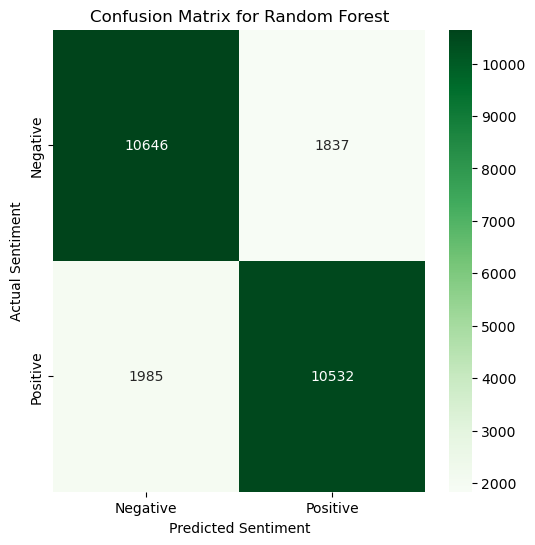

In [41]:
# Generate the confusion matrix for Random Forest
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix for Random Forest
plt.figure(figsize=(6,6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.title('Confusion Matrix for Random Forest')
plt.show()


Overall, the Random Forest model demonstrates solid performance, though it shows a higher tendency to misclassify reviews compared to SVM and Logistic Regression. The model produced 1,985 false negatives (positive reviews classified as negative) and 1,837 false positives (negative reviews classified as positive). This balance between false positives and false negatives indicates that Random Forest is less precise than the SVM and Logistic Regression models, especially in correctly identifying positive sentiment. 

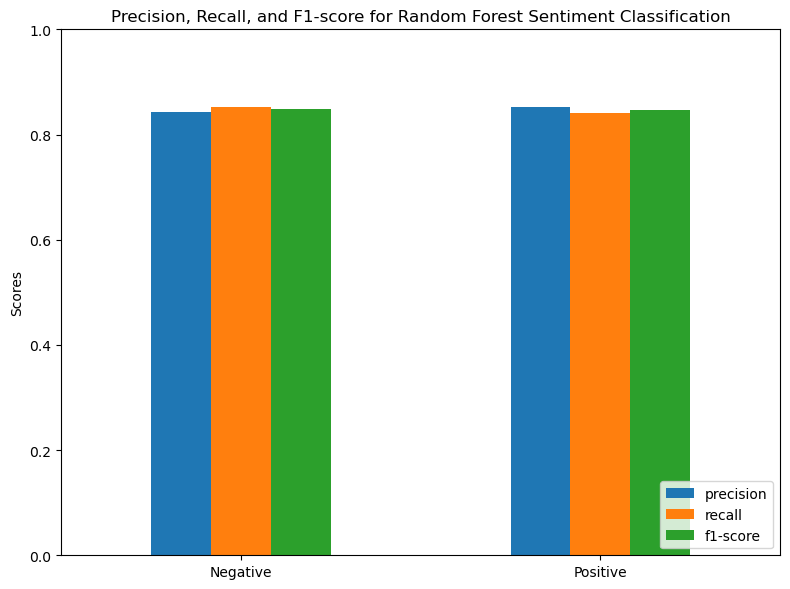

In [42]:
# Generate the classification report as a dictionary
rf_report = classification_report(y_test, y_pred_rf, target_names=['Negative', 'Positive'], output_dict=True)

# Convert the report dictionary to a DataFrame for easier plotting
df_rf_report = pd.DataFrame(rf_report).transpose()

# Only keep precision, recall, and F1-score for the two sentiment classes
df_rf_filtered = df_rf_report[['precision', 'recall', 'f1-score']].iloc[:2]  # Keeping only 'Negative' and 'Positive' classes

# Plot the bar chart
df_rf_filtered.plot(kind='bar', figsize=(8, 6))
plt.title('Precision, Recall, and F1-score for Random Forest Sentiment Classification')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## 5. XG Boost (Extreme Gradient Boosting)

### 5.1. Train the XG Boost Model

**XGBoost** (Extreme Gradient Boosting) is a powerful and efficient gradient boosting algorithm that has become a popular choice in machine learning competitions due to its ability to achieve high performance on a variety of tasks. It is known for its speed and accuracy, particularly in large datasets with complex patterns. In this project, we train the XGBoost model on the TF-IDF-transformed text data.


In [61]:
import xgboost as xgb

# Start timing
start_time = time.time()

# Initialise the XGBoost Classifier without 'use_label_encoder'
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

# Train the XGBoost model on the TF-IDF transformed data
xgb_model.fit(X_train_tfidf, y_train)

# End timing
end_time = time.time()

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test_tfidf)

# Calculate training time
training_time = end_time - start_time

print("XGBoost Model training complete and predictions made on the test set.")
print(f"Training time: {training_time:.2f} seconds")



XGBoost Model training complete and predictions made on the test set.
Training time: 41.85 seconds


### 5.2. Evaluate the XG Boost Model

After training the **XGBoost** model, we evaluate its performance using the standard metrics: **accuracy**, **precision**, **recall**, and **F1-score**. As expected, XGBoost demonstrates solid performance across all metrics, with balanced precision and recall, and a competitive **test accuracy** in line with expectations.

In [63]:
# Generate the classification report for XGBoost on the test set
print("XGBoost Classification Report (Test Set):")
print(classification_report(y_test, y_pred_xgb))

# Calculate the training accuracy (evaluate the model on the training data)
xgb_train_accuracy = xgb_model.score(X_train_tfidf, y_train)
print(f"XGBoost Training Accuracy: {xgb_train_accuracy * 100:.2f}%")

# Calculate accuracy on the test set
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Test Accuracy: {xgb_accuracy * 100:.2f}%")


XGBoost Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.87      0.82      0.84     12483
           1       0.83      0.87      0.85     12517

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000

XGBoost Training Accuracy: 93.73%
XGBoost Test Accuracy: 84.90%


The XGBoost model achieved an accuracy of **84.90%** with well-balanced precision and recall scores for both positive and negative sentiment. The model slightly favours correctly identifying negative reviews (precision of 0.87) and performs slightly better at recalling positive reviews (recall of 0.87). The overall F1-scores for both classes are consistently high, ensuring a solid balance between precision and recall. 

Compared to other models like Logistic Regression and SVM, XGBoost delivers comparable accuracy. However, comes at a cost of more computational time and complexity.

### 5.3. Visualising the XG Boost Model Performance

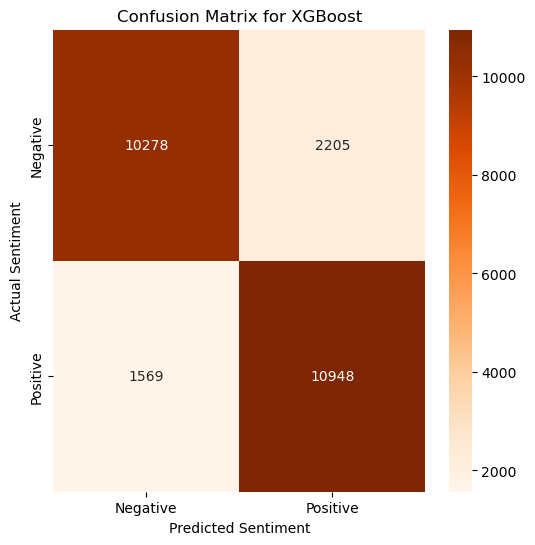

In [98]:
# Generate the confusion matrix for XGBoost
xgb_conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Plot the confusion matrix for XGBoost
plt.figure(figsize=(6,6))
sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.title('Confusion Matrix for XGBoost')
plt.show()


Overall, the XGBoost model shows balanced performance, though it tends to produce more false positives than false negatives. The model produced 2,205 false positives and 1,569 false negatives. 

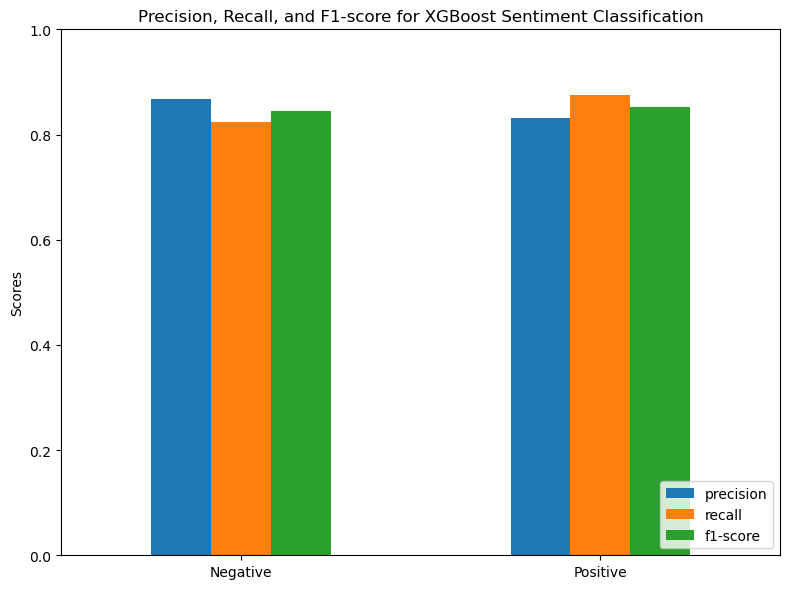

In [66]:
# Generate the classification report as a dictionary
xgb_report = classification_report(y_test, y_pred_xgb, target_names=['Negative', 'Positive'], output_dict=True)

# Convert the report dictionary to a DataFrame for easier plotting
df_xgb_report = pd.DataFrame(xgb_report).transpose()

# Only keep precision, recall, and F1-score for the two sentiment classes
df_xgb_filtered = df_xgb_report[['precision', 'recall', 'f1-score']].iloc[:2]  # Keeping only 'Negative' and 'Positive' classes

# Plot the bar chart
df_xgb_filtered.plot(kind='bar', figsize=(8, 6))
plt.title('Precision, Recall, and F1-score for XGBoost Sentiment Classification')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


## 6. Choosing the best model for analysing the IMDb movie reviews
After evaluating the performance of the models, **Logistic Regression** emerges as the best model for this **IMDb movie reviews** dataset based on the combination of **accuracy**, **precision**, **recall**, **F1-score**, and **training time**. Logistic Regression strikes a good balance between performance and efficiency, achieving the highest accuracy (88.44%) with a training time of only **0.52 seconds**, making it ideal for tasks where **speed and interpretability** are key considerations.


In [121]:
import pandas as pd

# Define the data
evaluation_data = {
    'Model': ['Logistic Regression', 'Support Vector Machine (SVM)', 'Random Forest', 'XGBoost'],
    'Test Accuracy (%)': [88.44, 88.10, 84.71, 84.90],
    'Precision (Negative)': [0.90, 0.89, 0.85, 0.87],
    'Precision (Positive)': [0.87, 0.87, 0.85, 0.83],
    'Recall (Negative)': [0.87, 0.87, 0.85, 0.82],
    'Recall (Positive)': [0.90, 0.89, 0.84, 0.87],
    'F1-Score (Negative)': [0.88, 0.88, 0.85, 0.85],
    'F1-Score (Positive)': [0.88, 0.88, 0.85, 0.85],
    'Training Time (seconds)': [0.52, 700.17, 75.90, 41.85]
}

# Create a DataFrame
df = pd.DataFrame(evaluation_data)

# Display the table
print(df)

                          Model  Test Accuracy (%)  Precision (Negative)  \
0           Logistic Regression              88.44                  0.90   
1  Support Vector Machine (SVM)              88.10                  0.89   
2                 Random Forest              84.71                  0.85   
3                       XGBoost              84.90                  0.87   

   Precision (Positive)  Recall (Negative)  Recall (Positive)  \
0                  0.87               0.87               0.90   
1                  0.87               0.87               0.89   
2                  0.85               0.85               0.84   
3                  0.83               0.82               0.87   

   F1-Score (Negative)  F1-Score (Positive)  Training Time (seconds)  
0                 0.88                 0.88                     0.52  
1                 0.88                 0.88                   700.17  
2                 0.85                 0.85                    75.90  
3        

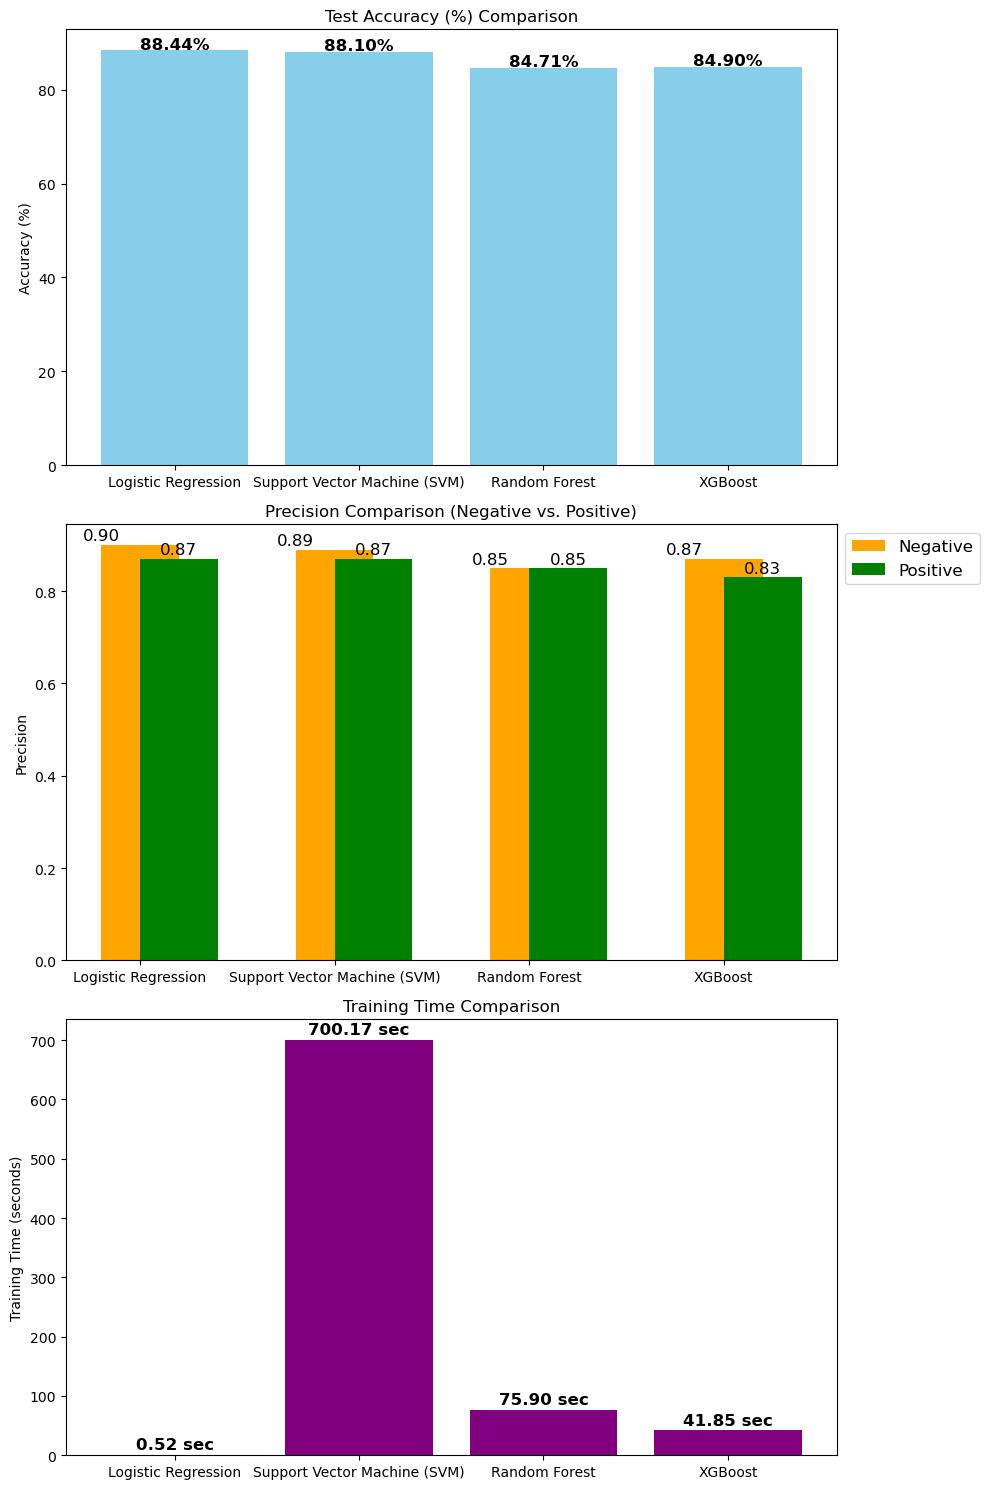

In [217]:
# Plot comparison of the models
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Accuracy comparison
ax[0].bar(df['Model'], df['Test Accuracy (%)'], color='skyblue')
ax[0].set_title('Test Accuracy (%) Comparison')
ax[0].set_ylabel('Accuracy (%)')
# Add labels above bars for Accuracy
for i, v in enumerate(df['Test Accuracy (%)']):
    ax[0].text(i, v + 0.3, f"{v:.2f}%", ha='center', fontsize=12, fontweight='bold')


# Precision comparison (Negative and Positive sentiments)
ax[1].bar(df['Model'], df['Precision (Negative)'], width=0.4, label='Negative', align='center', color='orange')
ax[1].bar(df['Model'], df['Precision (Positive)'], width=0.4, label='Positive', align='edge', color='green')
ax[1].set_title('Precision Comparison (Negative vs. Positive)')
ax[1].set_ylabel('Precision')
ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
# Add labels above bars for Precision
for i in range(len(df['Model'])):
    ax[1].text(i - 0.2, df['Precision (Negative)'][i] + 0.01, f"{df['Precision (Negative)'][i]:.2f}", ha='center', fontsize=12)
    ax[1].text(i + 0.2, df['Precision (Positive)'][i] + 0.01, f"{df['Precision (Positive)'][i]:.2f}", ha='center', fontsize=12)


# Training time comparison
ax[2].bar(df['Model'], df['Training Time (seconds)'], color='purple')
ax[2].set_title('Training Time Comparison')
ax[2].set_ylabel('Training Time (seconds)')
# Add labels above bars for Training Time
for i, v in enumerate(df['Training Time (seconds)']):
    ax[2].text(i, v + 10, f"{v:.2f} sec", ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

#### Why Logistic Regression is the Best Choice
**Logistic Regression** performs well on text classification tasks like sentiment analysis, especially when the feature space (generated by TF-IDF) is high-dimensional but largely **linear**. Logistic Regression is a **simple, interpretable, and computationally efficient model**, which makes it ideal for sentiment analysis tasks, where quick results and model transparency are important.

- **Efficiency**: Logistic Regression has the fastest training time of the models, making it suitable for real-time or large-scale analysis where frequent retraining is required.
- **Interpretability**: The coefficients of Logistic Regression provide clear insights into how individual words influence sentiment predictions, making it easy to understand the model’s decision-making process.

#### When SVM or XGBoost Might Be More Appropriate

While **Logistic Regression** is the best model for this particular dataset, there are scenarios where **SVM** or **XGBoost** might be more appropriate:

1. **SVM for Complex Decision Boundaries**:
   - **SVM** is a good choice when the dataset exhibits **non-linear relationships** or more complex decision boundaries. While this dataset seems to be well-separated by a linear boundary, in cases where the separation between classes is less clear, SVM’s ability to create complex decision boundaries through the use of a **kernel trick** can make it more effective. 
   - If **slightly higher accuracy** is critical, even at the cost of longer training times, **SVM** could be the preferred model. This might be particularly important in scenarios like **medical diagnostics** or **fraud detection**, where small improvements in accuracy can have significant real-world consequences.

2. **XGBoost for Complex Datasets**:
   - **XGBoost** is ideal for more **complex datasets** with **non-linear patterns**, **missing data**, or **imbalanced class distributions**. While XGBoost did not outperform Logistic Regression on this balanced dataset, its ability to handle **feature interactions** and **non-linear relationships** makes it a strong choice in cases where these factors are more prominent.
   - XGBoost's built-in **regularisation** also helps prevent overfitting, which can be particularly useful for datasets where overfitting is a concern. In applications where accuracy is critical and **computational resources** are available, **XGBoost** may be worth the added complexity, particularly when handling real-world datasets with messy or incomplete data.

#### Trade-offs
- **Logistic Regression** is the best choice for this particular dataset because of its **balance between performance and speed**. It is ideal when you need quick results and easy interpretability, and when the data is fairly linear and well-structured.
- **SVM** and **XGBoost**, while more complex and computationally intensive, offer advantages in scenarios where higher accuracy or the ability to handle complex patterns and feature interactions is more important.

#### Key Takeaway
For this IMDb movie reviews dataset, **Logistic Regression** provides the best balance of performance and efficiency. However, in scenarios where the dataset is more complex or accuracy is critical at the expense of training time, **SVM** or **XGBoost** might be more appropriate choices. The final model selection depends on the specific requirements of the task, such as the importance of accuracy, computational resources, and the complexity of the data.